# Data Science for Good - Jobs in LA

### Objective
The goal of this project is to uncover biases in job postings released by the city of L.A.
Indeed, 1/3 of the employees will retire in 2020 and they need help to optimize their recruitment process and eliminate or make not to induce unconscious discriminations.

### The data
We've been provided with 683 job postings as txt files an some additionnal data about paths for promotion and pdf of job postings.
For the project, we will only use the job posting txt files. 

### Plan of action
We'll be performing the following actions :
* Exploratory Data Analysis

* Uncover gender bias
> Job posting analysis with the gender decoder
> Requirements length : proven that women tends to get discouraged by a too long list of requirements
* Explore other biases 
> Number of steps in the recruitement process : do they relate to the seniority of the position ? Are they necessary ?
> Deadline for applying : a too short deadline can make the recruiter miss out on candidates
> Requirements vs degree : are they adequate ? Is degree as important as experience and requirements ? Could prevent discriminations towards minorities who do not get easy access to education.

Quelques faits : 
En 2010, LA compte 12M d'habitants (18M avec agglomération)
~52% de blancs, ~23% "autres", ~12% d'asiatiques, 9% afro-américains, ~3% plusieurs origines
Le revenu median par personne est de $27,749

# 0. Data manipulation
We are going to work with the job posting in txt format. All of them (683 files) are structured about the same way so we will compute a dataframe of every job posting first in order to perform further analysis.

In [2]:
# Imports
import os 
import pandas as pd
import re
from datetime import datetime
import numpy as np
import seaborn as sns

# import genderdecoder

In [3]:
# variable definition
path_bulletins = r".\data-science-for-good-city-of-los-angeles\CityofLA\Job Bulletins"
bulletins=os.listdir(path_bulletins)

In [4]:
def days_between(d1, d2):
    try:
        d1 = datetime.strptime(d1.strftime("%Y-%m-%d"), "%Y-%m-%d")
        d2 = datetime.strptime(d2.strftime("%Y-%m-%d"), "%Y-%m-%d")
        return abs((d2 - d1).days)
    except:
        return np.nan


def to_dataframe(num, df, locationdir):
    """"function to extract features from job bulletin text files and convert to
    pandas dataframe.
    Arguments :
    1.the number of files to be read
    2.dataframe object                                      
    3.directory in which the files are located                        
    """
    opendate=re.compile(r'(Open [D,d]ate:)(\s+)(\d\d-\d\d-\d\d)')       #match open date
    
    salary=re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')       #match salary
    
    requirements=re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)')      #match requirements
    
    for no in range(0,num):
        nblines = 0
        nbchars = 0
        with open(locationdir+"/" +bulletins[no],encoding="ISO-8859-1") as f:         #reading files 
                try:
                    file=f.read().replace('\t','')
                    nblines = file.count('\n')
                    raw_text=file.replace('\n',' ')
                    data=file.replace('\n','')
                    nbchars = len(data)
                    # print(data)
                    headings=[heading for heading in file.split('\n') if heading.isupper()]             ##getting heading from job bulletin

                    
                    try:
                        sal=re.search(salary,data)
                    except:
                        sal=np.nan
                        #print(bulletins[no])
                        #print("no matching salary")
                    
                    try:
                        odate=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%y')
                    except:
                        date=np.nan
                        #print(bulletins[no])
                        #print("no matching opendate")
                        
                    try:
                        req=re.search(requirements,data).group(2)
                    except Exception as e:
                        try:
                            req=re.search('(.*)NOTES?',re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)',
                                                              data)[0][1][:1200]).group(1)
                        except:
                            date=np.nan
                            #print(bulletins[no])
                            #print("no matching requirements")
                    
                    duties=re.search(r'(DUTIES)(.*)(REQ[A-Z])',data).group(2)
                    
                        
                    try:
                        enddate=re.search(
                                r'(JANUARY|FEBRUARY|MARCH|APRIL|MAY|JUNE|JULY|AUGUST|SEPTEMBER|OCTOBER|NOVEMBER|DECEMBER)\s(\d{1,2},\s\d{4})'
                                ,data).group()
                    except Exception as e:
                        enddate=np.nan
                        #print(bulletins[no])
                        #print("no matching enddate")
                    
                    try:
                        selection= [z[0] for z in re.findall('([A-Z][a-z]+)((\s\.\s)+)',data)]     ##match selection criteria
                    except:
                        selection=np.nan
                        #print(bulletins[no])
                        #print("no matching selection")
                        
                        
                    
                    try:
                        # Retreiving deadline application in appropriate date format
                        edate = datetime.strptime(enddate.replace(',',''),"%B %d %Y")
                    except:
                        edate = np.nan
                        #print(bulletins[no])
                        #print('error retrieving edate')
                        #print("enddate")
                        #print(enddate)
                    
                    
                    validity_duration = days_between(odate, edate)
                    
                    try:
                        validity_duration = days_between(odate, edate)
                    except:
                        validity_duration = np.nan
                        #print(bulletins[no])
                        #print('error retrieving validity_duration')
                    
                    #compute number of requirements that may dissuade potential candidates 
                    if '10. ' in req:
                        nb_requirements = 10
                    elif '9. ' in req:
                        nb_requirements = 9
                    elif '8. ' in req:
                        nb_requirements = 8
                    elif '7. ' in req:
                        nb_requirements = 7
                    elif '6. ' in req:
                        nb_requirements = 6
                    elif '5. ' in req:
                        nb_requirements = 5
                    elif '4. ' in req:
                        nb_requirements = 4
                    elif '3. ' in req:
                        nb_requirements = 3
                    elif '2. ' in req:
                        nb_requirements = 2
                    else:
                        nb_requirements = 1
                    
                    #compute number of selection steps that may dissuade potential candidates
                    nb_selection_steps = len(selection)
                    
                    #encode if there is a writing test, an essay or additional selection steps
                    if 'Test' in selection:
                        select_wtest = 1
                    else:
                        select_wtest = 0
                        
                    if 'Essay' in selection: 
                        select_essay = 1
                    else:
                        select_essay = 0    
                        
                    if 'Interview' in selection:
                        select_interv = 1
                    else:
                        select_interv = 0    
                    
                    df=df.append({'File Name':bulletins[no],'Position':headings[0].lower(),'salary_start':sal.group(1),
                               'salary_end':sal.group(5),"opendate":odate,"requirements":req,'duties':duties,
                                'deadline':enddate,'deadline_date':edate, 'validity_duration':validity_duration,'selection':selection,
                                'nb_lines':nblines, 'nb_chars':nbchars, 'nb_requirements':nb_requirements, 'nb_selection_steps':nb_selection_steps,
                                'WTest':select_wtest, 'Essay':select_essay, 'Interview':select_interv, 'raw_job_text':raw_text },ignore_index=True)
                    
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)')
                    df['EXPERIENCE_LENGTH']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['FULL_TIME_PART_TIME']=df['EXPERIENCE_LENGTH'].apply(lambda x:  'FULL_TIME' if x is not np.nan else np.nan )
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\s(college)')
                    df['EDUCATION_YEARS']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['SCHOOL_TYPE']=df['EDUCATION_YEARS'].apply(lambda x : 'College or University' if x is not np.nan else np.nan)
                    
                   
                    
                except Exception as e:
                    print(e)
                    print('umatched sequence')
             
    return df

#### 1. Gather all job postings into one dataframe to manipulate the data

In [9]:
df = pd.DataFrame(columns=['File Name','Position','salary_start','salary_end','opendate','requirements','duties','deadline', 'deadline_date','validity_duration', 'selection', 'nb_lines','nb_chars'])
df = to_dataframe(len(bulletins),df, path_bulletins)

'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence
'NoneType' object has no attribute 'group'
umatched sequence


Let's check out the  resulting dataframe

In [213]:
df.to_csv("./res/jobs.csv")
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,Essay,Interview,WTest,nb_requirements,nb_selection_steps,raw_job_text,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,0.0,1.0,0.0,3.0,1.0,311 DIRECTOR Class Code: 9206 Open Date:...,One,FULL_TIME,NaN,NaN
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,0.0,1.0,1.0,1.0,2.0,ACCOUNTANT Class Code: 1513 Open Date: ...,NaN,NaN,four,College or University
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"49,005","$71,618",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,NaN,NaT,NaN,...,0.0,0.0,1.0,1.0,1.0,ACCOUNTING CLERK Class Code: 1223 Open ...,Two,FULL_TIME,NaN,NaN
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,0.0,1.0,1.0,1.0,2.0,ACCOUNTING RECORDS SUPERVISOR Class Code: ...,Two,FULL_TIME,NaN,NaN
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,1.0,1.0,1.0,3.0,3.0,ADMINISTRATIVE ANALYST Class Code: 1590...,One,FULL_TIME,four,College or University


In [214]:
df["File Name"].count()

675

683 offres d'emploi sous format txt existent dans le dossierfourni par la ville de LA et 675 offres d'emploi ont été placées dans le dataframe (regex non matchées)

#### 2. Gender bias analysis

Let's assign a "tendency" to each job posting based on the following paper :
https://www.hw.ac.uk/services/docs/gendered-wording-in-job-ads.pdf

In [215]:
df['GENDER_WORDS'] = df['duties'].apply(lambda x : genderdecoder.assess(x)['result'])

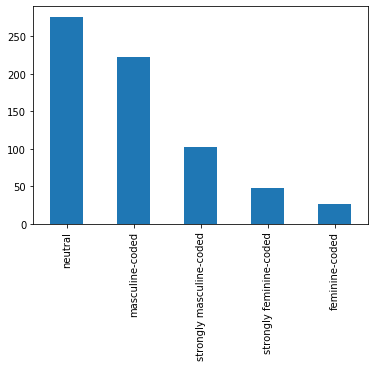

In [216]:
df["GENDER_WORDS"].value_counts().plot(kind='bar')

In [10]:
df.head(2)

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,Interview,WTest,nb_requirements,nb_selection_steps,raw_job_text,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,GENDER_WORDS
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,1.0,0.0,3.0,1.0,311 DIRECTOR Class Code: 9206 Open Date:...,One,FULL_TIME,NaN,NaN,neutral
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,1.0,1.0,1.0,2.0,ACCOUNTANT Class Code: 1513 Open Date: ...,NaN,NaN,four,College or University,strongly masculine-coded


# Distribution by year

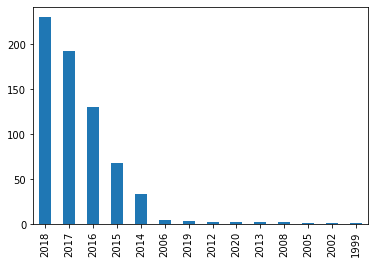

In [217]:
df_opendates = df.copy()

df_opendates['year'] = df.opendate.dt.year
df_opendates['month'] = df.opendate.dt.month
df_opendates['day'] = df.opendate.dt.day
df_opendates['weekday'] = df.opendate.dt.weekday_name
df_opendates['yearmonth'] = df.opendate.map(lambda x: 100*x.year + x.month)

df_opendates["year"].value_counts().plot(kind='bar')

> The number of job postings began to increase greatly from 2014 to 2018

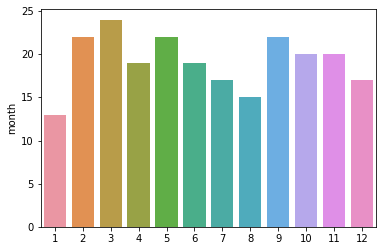

In [218]:
# Distribution by months
df_offers_by_month = pd.DataFrame(df_opendates[df_opendates['year'] == 2018]['month'].value_counts())
# print(df_offers_by_month)

ax = sns.barplot(x=df_offers_by_month.index, y=df_offers_by_month.month, data=df_offers_by_month)

In [219]:
df_opendates[df_opendates['year'] == 2018]['month'].values

array([ 6,  7,  7,  6,  3, 11,  8,  7,  7,  2,  2, 11, 12,  6,  8,  6,  3,
        2,  9, 10,  1,  3,  5, 10, 10,  1,  3, 12, 10, 11,  3, 12,  1,  3,
        8, 12,  3,  9,  2,  2,  4,  4,  3,  9, 12,  2, 12,  9,  5,  8,  7,
        6, 11,  1,  6,  3, 11,  2, 10,  8,  3, 11,  4,  4,  1,  4, 10,  2,
        3, 12,  9, 11,  3,  9, 10, 11,  2,  6,  5,  5,  4,  8,  2,  3,  4,
        1, 10,  6, 10,  9,  1, 12,  8,  5,  7,  6,  8,  5,  1,  6,  1,  6,
        9,  5, 12, 11, 11,  9,  3,  1,  5,  8, 12,  5,  9,  3,  3, 11,  9,
       10,  7,  7,  4, 10,  9,  5,  4, 11,  8, 11, 10,  8,  3,  2,  7,  7,
        3,  2, 11,  2, 10,  2, 10,  9,  2, 11,  7,  3,  3,  2, 10,  5,  7,
        2,  2,  7,  6,  5,  8,  3,  7,  6, 11,  9, 10,  8,  4, 12,  4,  6,
        4,  6,  1,  9,  4,  2, 11,  5,  6,  4,  4, 12,  5,  2,  4,  4, 10,
       12,  5,  6,  8,  5, 11,  5,  4,  9,  2,  5,  5,  5,  2, 10,  3, 10,
        1,  8,  9, 11,  6,  3,  5,  7,  1, 10, 12,  9,  9,  3,  9, 11, 12,
        4, 12,  7,  6, 12

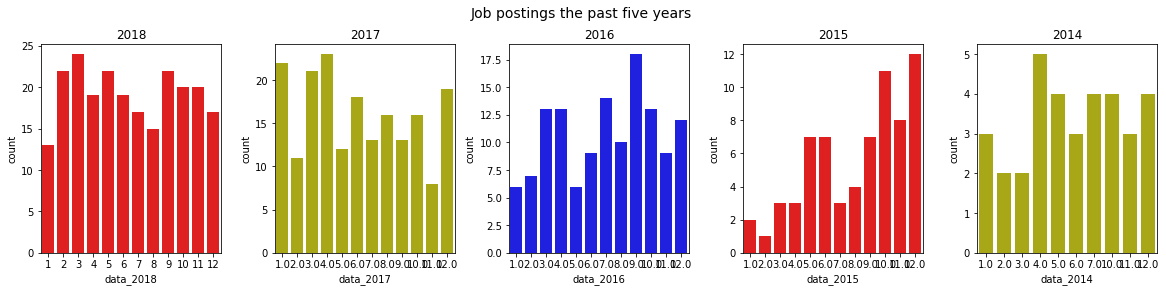

In [220]:
fig = plt.figure(figsize=(20,4))
title = fig.suptitle("Job postings the past five years", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,5,1)
ax1.set_title("2018")
sns.countplot(df_od['data_2018'], ax=ax1, color='r')

ax2 = fig.add_subplot(1,5,2)
ax2.set_title("2017")
sns.countplot(df_od['data_2017'], ax=ax2, color='y')

ax3 = fig.add_subplot(1,5,3)
ax3.set_title("2016")
sns.countplot(df_od['data_2016'], ax=ax3, color='b')


ax4 = fig.add_subplot(1,5,4)
ax4.set_title("2015")
sns.countplot(df_od['data_2015'], ax=ax4, color='r')

ax5 = fig.add_subplot(1,5,5)
ax5.set_title("2014")
sns.countplot(df_od['data_2014'], ax=ax5, color='y')


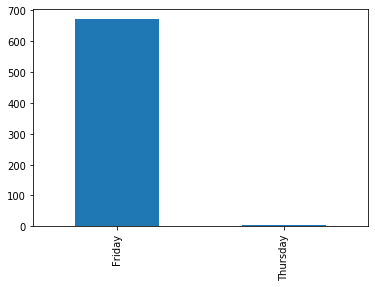

In [221]:
df_opendates["weekday"].value_counts().plot(kind='bar')

> All job postings were made on a friday

In [222]:
df['nb_requirements'].describe()

count    675.000000
mean       1.924444
std        1.080682
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        9.000000
Name: nb_requirements, dtype: float64

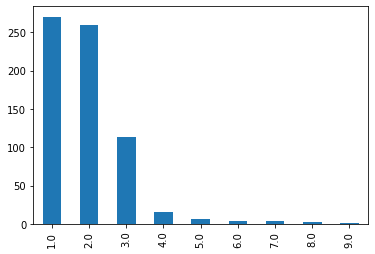

In [225]:
df['nb_requirements'].value_counts().plot(kind='bar')

In [226]:
df['nb_selection_steps'].describe()

count    675.000000
mean       1.263704
std        0.771392
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: nb_selection_steps, dtype: float64

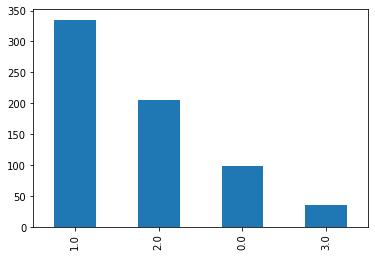

In [227]:
df['nb_selection_steps'].value_counts().plot(kind='bar')

In [228]:
df['nb_lines'].describe()

count     675
unique     63
top        83
freq       31
Name: nb_lines, dtype: int64

In [229]:
df['nb_lines'].value_counts().head(10)

83    31
85    29
80    29
76    28
82    26
81    26
78    26
77    25
88    25
84    24
Name: nb_lines, dtype: int64

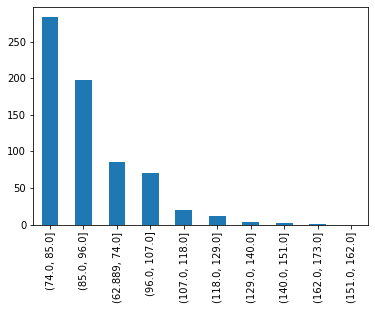

In [234]:
df['nb_lines'].value_counts(bins=10).plot(kind='bar')

In [235]:
df['validity_duration'].describe()

count     625
unique     38
top        13
freq      494
Name: validity_duration, dtype: int64

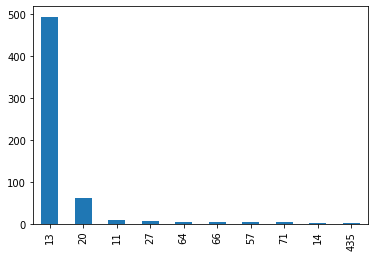

In [236]:
# Ne visualiser que les 10 premiers pour se faire une première idée sans "polluer"
df['validity_duration'].value_counts().head(10).plot(kind='bar')

In [237]:
df['validity_duration'].value_counts().head(10)

13     494
20      61
11      10
27       6
64       5
66       4
57       4
71       4
14       3
435      2
Name: validity_duration, dtype: int64

### Named Entity Recognition

In [238]:
df_encoded = df[["raw_job_text", "validity_duration", "Essay", "Interview", "WTest", "nb_requirements", "nb_selection_steps", "EXPERIENCE_LENGTH", "FULL_TIME_PART_TIME", "EDUCATION_YEARS", "SCHOOL_TYPE", "GENDER_WORDS"]]

In [239]:
import spacy
from pprint import pprint
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [240]:
bull = nlp(bulletins[0])
pprint([(X.text, X.label_) for X in bull.ents])

[('311', 'CARDINAL'), ('9206', 'CARDINAL')]


#### Enrichir le df avec les NER

In [241]:
def get_NER(text):
    doc = nlp(text)
    labels = [x.label_ for x in doc.ents]
    return Counter(labels)
    
df_encoded['NER'] = df_encoded['raw_job_text'].apply(lambda x : get_NER(x))

C:\Users\Virginie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [242]:
df_encoded.head()

,raw_job_text,validity_duration,Essay,Interview,WTest,nb_requirements,nb_selection_steps,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,GENDER_WORDS,NER
0,311 DIRECTOR Class Code: 9206 Open Date:...,13,0.0,1.0,0.0,3.0,1.0,One,FULL_TIME,NaN,NaN,neutral,"{'CARDINAL': 35, 'MONEY': 3, 'NORP': 2, 'DATE'..."
1,ACCOUNTANT Class Code: 1513 Open Date: ...,64,0.0,1.0,1.0,1.0,2.0,NaN,NaN,four,College or University,strongly masculine-coded,"{'ORG': 28, 'MONEY': 3, 'PRODUCT': 4, 'CARDINA..."
2,ACCOUNTING CLERK Class Code: 1223 Open ...,NaN,0.0,0.0,1.0,1.0,1.0,Two,FULL_TIME,NaN,NaN,neutral,"{'ORG': 24, 'MONEY': 2, 'DATE': 16, 'NORP': 5,..."
3,ACCOUNTING RECORDS SUPERVISOR Class Code: ...,13,0.0,1.0,1.0,1.0,2.0,Two,FULL_TIME,NaN,NaN,neutral,"{'CARDINAL': 14, 'ORG': 25, 'MONEY': 4, 'PRODU..."
4,ADMINISTRATIVE ANALYST Class Code: 1590...,13,1.0,1.0,1.0,3.0,3.0,One,FULL_TIME,four,College or University,strongly masculine-coded,"{'ORG': 38, 'DATE': 20, 'MONEY': 4, 'PRODUCT':..."


In [147]:
test = nlp(df_encoded['raw_job_text'][0])
items = [x.text for x in test.ents]
Counter(items).most_common(3)

[('City', 7), ('311', 5), ('1', 4)]

In [245]:
req =''.join(req for req in df['requirements'])
test_req = nlp(req)
items = [x.text for x in test_req.ents]
Counter(items).most_common(10)

[('the City of Los Angeles', 343),
 ('Two years of full-time', 199),
 ('Two years', 180),
 ('four-year', 145),
 ('Four years', 136),
 ('1', 116),
 ('One year', 111),
 ('one year', 95),
 ('and2', 91),
 ('Three years', 85)]

In [246]:
Counter(items).most_common(20)

[('the City of Los Angeles', 343),
 ('Two years of full-time', 199),
 ('Two years', 180),
 ('four-year', 145),
 ('Four years', 136),
 ('1', 116),
 ('One year', 111),
 ('one year', 95),
 ('and2', 91),
 ('Three years', 85),
 ('two years', 76),
 ('2', 51),
 ('California', 36),
 ('six months', 33),
 ('one', 32),
 ('18 quarter', 30),
 ('3', 29),
 ('three', 26),
 ('APPLYApplications', 25),
 ('Engineer', 24)]

In [145]:
from spacy import displacy
displacy.render(nlp(str(df_encoded['raw_job_text'][0])), jupyter=True, style='ent')

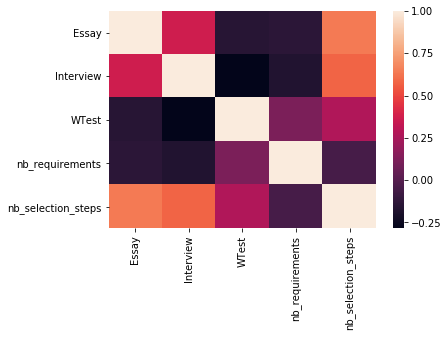

In [24]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Let's encode our dataframe categorical values to get more variables in the correlation matrix 

In [25]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,Essay,Interview,WTest,nb_requirements,nb_selection_steps,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,GENDER_WORDS
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,0.0,1.0,0.0,3.0,1.0,One,FULL_TIME,NaN,NaN,neutral
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,0.0,1.0,1.0,1.0,2.0,NaN,NaN,four,College or University,strongly masculine-coded
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"49,005","$71,618",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,NaN,NaT,NaN,...,0.0,0.0,1.0,1.0,1.0,Two,FULL_TIME,NaN,NaN,neutral
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,0.0,1.0,1.0,1.0,2.0,Two,FULL_TIME,NaN,NaN,neutral
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,1.0,1.0,1.0,3.0,3.0,One,FULL_TIME,four,College or University,strongly masculine-coded


In [28]:
df_encoded.head()

,validity_duration,Essay,Interview,WTest,nb_requirements,nb_selection_steps,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,GENDER_WORDS
0,13,0.0,1.0,0.0,3.0,1.0,One,FULL_TIME,NaN,NaN,neutral
1,64,0.0,1.0,1.0,1.0,2.0,NaN,NaN,four,College or University,strongly masculine-coded
2,NaN,0.0,0.0,1.0,1.0,1.0,Two,FULL_TIME,NaN,NaN,neutral
3,13,0.0,1.0,1.0,1.0,2.0,Two,FULL_TIME,NaN,NaN,neutral
4,13,1.0,1.0,1.0,3.0,3.0,One,FULL_TIME,four,College or University,strongly masculine-coded


In [36]:
def isNaN(num):
    return num != num

def get_nb(val):
    if not isNaN(val):
        if val.lower() == 'one':
            return 1
        if val.lower() == 'two':
            return 2
        if val.lower() == 'three':
            return 3
        if val.lower() == 'four':
            return 4
        if val.lower() == 'five':
            return 5
        if val.lower() == 'six':
            return 6
        if val.lower() == 'seven':
            return 7
        if val.lower() == 'eight':
            return 8
        if val.lower() == 'nine':
            return 9
        if val.lower() == 'ten':
            return 10
        else:
            print(val)
            return np.nan
    
df_encoded['exp_years'] = df_encoded['EXPERIENCE_LENGTH'].apply(lambda x : get_nb(x))

C:\Users\Virginie\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
def code_ft_pt(val):
    if not isNaN(val):
        if val == "PART_TIME":
            return 1
        if val == "FULL_TIME":
            return 2
        else:
            return np.nan
        
df_encoded['full_time_part_time_code'] = df_encoded['FULL_TIME_PART_TIME'].apply(lambda x : code_ft_pt(x))

C:\Users\Virginie\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
def code_gender_bias(val):
    if not isNaN(val):
        if val == "neutral":
            return 0
        if val == 'masculine-coded':
            return 1
        if val == 'strongly masculine-coded':
            return 2
        if val == 'feminine-coded':
            return 3
        if val == 'strongly feminine-coded':
            return 4
        else:
            return np.nan
        
def code_school(val):
    if not isNaN(val):
        if val == "College or University":
            return 1 
        else: 
            return 0 
    
df_encoded['gender_bias_code'] = df_encoded['GENDER_WORDS'].apply(lambda x : code_gender_bias(x))
df_encoded['high_education'] = df_encoded['SCHOOL_TYPE'].apply(lambda x : code_school(x) )

C:\Users\Virginie\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Virginie\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [61]:
print(df_encoded['FULL_TIME_PART_TIME'].describe())
print(df_encoded['FULL_TIME_PART_TIME'].unique())
print(df_encoded['FULL_TIME_PART_TIME'].value_counts()) # ne compte pas les nan
print(df_encoded['FULL_TIME_PART_TIME'].isnull().sum()) # décompte des nan

count           576
unique            1
top       FULL_TIME
freq            576
Name: FULL_TIME_PART_TIME, dtype: object
['FULL_TIME' nan]
FULL_TIME    576
Name: FULL_TIME_PART_TIME, dtype: int64
99


FULL_TIME_PART_TIME contient des full time à 90%, le reste étant des NaN, supprimons cette colonne ainsi que les data categorical initiales

In [68]:
df_encoded.drop(columns=["full_time_part_time_code", "EXPERIENCE_LENGTH","FULL_TIME_PART_TIME", "EDUCATION_YEARS", "SCHOOL_TYPE", "GENDER_WORDS"], inplace=True)
df_encoded.head()

KeyError: "['EXPERIENCE_LENGTH' 'FULL_TIME_PART_TIME' 'EDUCATION_YEARS' 'SCHOOL_TYPE'\n 'GENDER_WORDS'] not found in axis"

In [70]:
print(df_encoded['high_education'].describe())
print(df_encoded['high_education'].unique())
print(df_encoded['high_education'].value_counts()) # ne compte pas les nan
print(df_encoded['high_education'].isnull().sum()) # décompte des nan

count    122.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: high_education, dtype: float64
[nan  1.]
1.0    122
Name: high_education, dtype: int64
553


C:\Users\Virginie\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


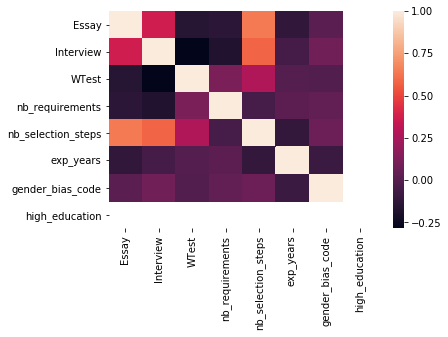

In [69]:
corr = df_encoded.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Word Embedding

In [6]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,Essay,Interview,WTest,nb_requirements,nb_selection_steps,raw_job_text,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,0.0,1.0,0.0,3.0,1.0,311 DIRECTOR Class Code: 9206 Open Date:...,One,FULL_TIME,NaN,NaN
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,0.0,1.0,1.0,1.0,2.0,ACCOUNTANT Class Code: 1513 Open Date: ...,NaN,NaN,four,College or University
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"49,005","$71,618",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,NaN,NaT,NaN,...,0.0,0.0,1.0,1.0,1.0,ACCOUNTING CLERK Class Code: 1223 Open ...,Two,FULL_TIME,NaN,NaN
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,0.0,1.0,1.0,1.0,2.0,ACCOUNTING RECORDS SUPERVISOR Class Code: ...,Two,FULL_TIME,NaN,NaN
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,1.0,1.0,1.0,3.0,3.0,ADMINISTRATIVE ANALYST Class Code: 1590...,One,FULL_TIME,four,College or University


In [7]:
input_text = '\n'.join(df['duties'].head(10))

In [9]:
# store as list of sentences
sentences_strings_ted = []
for line in input_text.split('\n'):
    m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
    sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
# store as list of lists of words
sentences_ted = []
for sent_str in sentences_strings_ted:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    sentences_ted.append(tokens)


In [25]:
from gensim.models import FastText
model_ted = FastText(sentences_ted, size=100, window=5, min_count=5, workers=4,sg=1)

In [150]:
model_ted.wv.most_similar("director")

[('or', 0.42732346057891846),
 ('may', 0.14017435908317566),
 ('an', 0.13665969669818878),
 ('work', 0.08954170346260071),
 ('the', 0.08024299889802933),
 ('city', 0.06909815222024918),
 ('accounting', 0.05355009436607361),
 ('administrative', -0.008285179734230042),
 ('related', -0.04724358767271042),
 ('a', -0.07855833321809769)]

# Explore sectors

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Virginie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Virginie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0, 0.5, 'sector')

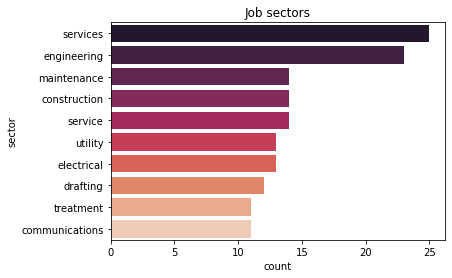

In [145]:
import nltk
import pickle
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import re
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict, Counter
import collections

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

nltk.download('punkt')

text=''.join(job for job in df['Position'])                             ##joining  data to form text
text=word_tokenize(text)
jobs=Counter(text)                                                         ##counting number of occurences
jobs_class=[job for job in jobs.most_common(12) if len(job[0])>3]          ##selecting most common words
#offers=[job[1] for job in jobs.most_common(12) if len(job[0]>3)]
a,b=map(list, zip(*jobs_class))
sns.barplot(b,a,palette='rocket')                                           ##creating barplot
plt.title('Job sectors')
plt.xlabel("count")
plt.ylabel('sector')

In [ ]:
# salaries
df["salary_start_num2"] = df['salary_start'].replace(',','')
df["salary_start_num2"] = df["salary_start_num"].apply(lambda x:x.replace(',',''))
df["salary_start_num2"]


In [ ]:
df["salary_start_num3"] = df["salary_start_num2"].apply(lambda x :pd.to_numeric(x))
df["salary_start_num3"]
# best paid jobs

In [128]:
df['salary_level'] = pd.cut(df["salary_start_num3"], 5, labels=["lowest", "low", "medium", "medium-high", "high"])
df.head()
# wordcloud duties and requirements

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,raw_job_text,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,salary_start_num,salary_start_num2,salary_start_num3,salary_start_range,salary_level
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,311 DIRECTOR Class Code: 9206 Open Date:...,One,FULL_TIME,NaN,NaN,29733,125175,125175,[119733 - 149733),medium
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,ACCOUNTANT Class Code: 1513 Open Date: ...,NaN,NaN,four,College or University,29733,49903,49903,[29733 - 59733),lowest
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"49,005","$71,618",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,NaN,NaT,NaN,...,ACCOUNTING CLERK Class Code: 1223 Open ...,Two,FULL_TIME,NaN,NaN,29733,49005,49005,[29733 - 59733),lowest
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,ACCOUNTING RECORDS SUPERVISOR Class Code: ...,Two,FULL_TIME,NaN,NaN,29733,55332,55332,[29733 - 59733),lowest
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,ADMINISTRATIVE ANALYST Class Code: 1590...,One,FULL_TIME,four,College or University,29733,60489,60489,[59733 - 89733),lowest


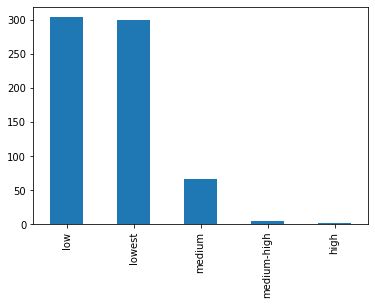

In [147]:
df['salary_level'].value_counts().plot(kind='bar')

In [116]:
# En appliquant des tranches de 30000$
print(df['salary_start_num3'].min())
print(df['salary_start_num3'].max())
salary_start_ranges = ["[{0} - {1})".format(sal, sal + 30000) for sal in range(df['salary_start_num3'].min(), df['salary_start_num3'].max(), 30000)]
count_unique_salary_start_ranges = len(salary_start_ranges)
salary_start_ranges

29733
245758


['[29733 - 59733)',
 '[59733 - 89733)',
 '[89733 - 119733)',
 '[119733 - 149733)',
 '[149733 - 179733)',
 '[179733 - 209733)',
 '[209733 - 239733)',
 '[239733 - 269733)']

In [117]:
df['salary_start_range'] = pd.cut(x=df['salary_start_num3'], bins=count_unique_salary_start_ranges, labels=salary_start_ranges)

In [119]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,deadline_date,validity_duration,...,nb_selection_steps,raw_job_text,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,salary_start_num,salary_start_num2,salary_start_num3,salary_start_range
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",2014-05-01,13,...,1.0,311 DIRECTOR Class Code: 9206 Open Date:...,One,FULL_TIME,NaN,NaN,29733,125175,125175,[119733 - 149733)
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018",2018-08-25,64,...,2.0,ACCOUNTANT Class Code: 1513 Open Date: ...,NaN,NaN,four,College or University,29733,49903,49903,[29733 - 59733)
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"49,005","$71,618",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,NaN,NaT,NaN,...,1.0,ACCOUNTING CLERK Class Code: 1223 Open ...,Two,FULL_TIME,NaN,NaN,29733,49005,49005,[29733 - 59733)
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018",2018-08-09,13,...,2.0,ACCOUNTING RECORDS SUPERVISOR Class Code: ...,Two,FULL_TIME,NaN,NaN,29733,55332,55332,[29733 - 59733)
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018",2018-06-14,13,...,3.0,ADMINISTRATIVE ANALYST Class Code: 1590...,One,FULL_TIME,four,College or University,29733,60489,60489,[59733 - 89733)


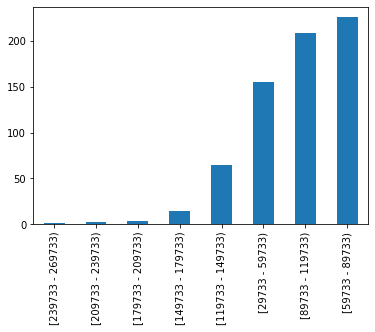

In [136]:
df['salary_start_range'].value_counts().plot(kind='bar')

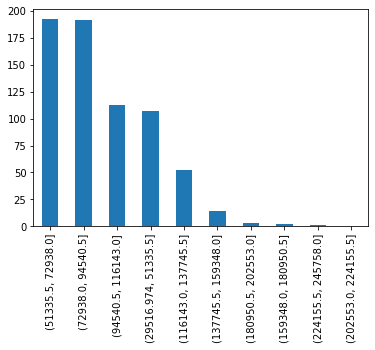

In [141]:
df['salary_start_num3'].value_counts(bins=10).plot(kind='bar')

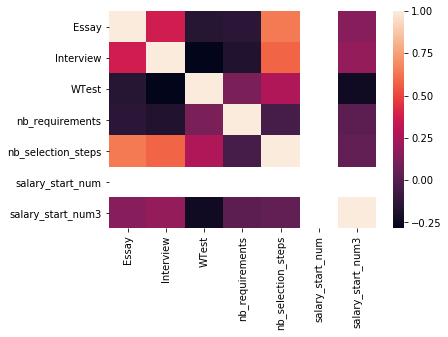

In [148]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

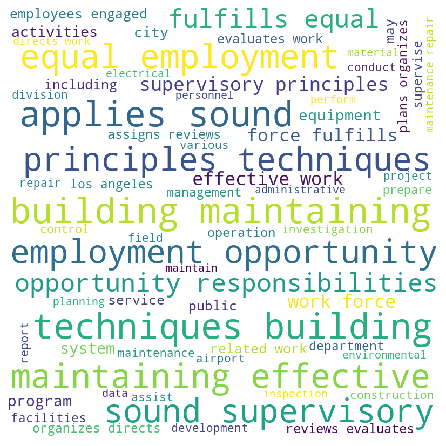

In [74]:
def get_stopwords(text):
    return ' '.join([w for w in word_tokenize(text.lower()) if not w in stop_words])

def generate_wordcloud(text):
    data=get_stopwords(text)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 20,max_words=100).generate(data)
    
    # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    
text=''.join(req for req in df['duties']) 
generate_wordcloud(text)

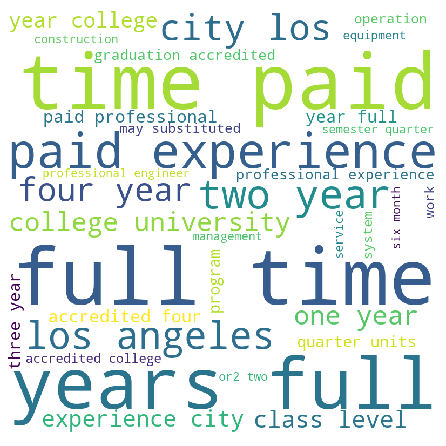

In [75]:
text=''.join(req for req in df['requirements']) 
generate_wordcloud(text)

# Correlations 

In [208]:
df.head()

,batting
0,6
1,7
2,7
3,6
4,3
